In [1]:
# for automatic reloading
%load_ext autoreload
%autoreload 2

In [2]:
from birdbrain.atlas import atlas
import numpy as np

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from birdbrain.utils import um_to_vox

In [4]:
from birdbrain.visualization.plotting_2d import plot_2d_coordinates

In [5]:
dset_dir = '../../data/processed/starling/'

starling_atlas = atlas(
    species = 'starling',
    dset_dir = dset_dir,
    um_mult = 100,
    smoothing = []#['Brain', 'Brainregions']
)

starling.zip: 0.00B [00:00, ?B/s]

qform_code 32 not valid; setting to 0                               
qform_code 32 not valid; setting to 0


Loading brain labels...
Getting voxel data from .img files...


qform_code 32 not valid; setting to 0
qform_code 32 not valid; setting to 0


Getting location for each nucleus/region from voxel data...


Atlas created


In [6]:
starling_atlas.brain_labels[:3]

,label,region,type_
region,,,
Nidopallium,1,Nidopallium,Brainregions
Mesopallium,2,Mesopallium,Brainregions
Arcopallium,3,Arcopallium,Brainregions


In [8]:
# initial location of y sinus
ysin_in_um = [0,0,0]
# get the voxel location 
y_sin_in_vox = um_to_vox(ysin_in_um, starling_atlas.voxel_data.loc['Brain','affine'], starling_atlas.um_mult, starling_atlas.y_sinus_um_transform)
print(y_sin_in_vox)

[126  80 205]


### Plot default location of y sinus 
- the atlas' y-sinus is around 1mm posterior to where our lab tends to consider y sinus and a few microns from the center

{'medial-lateral': 0, 'anterior-posterior': 0, 'dorsal-ventral': 0}


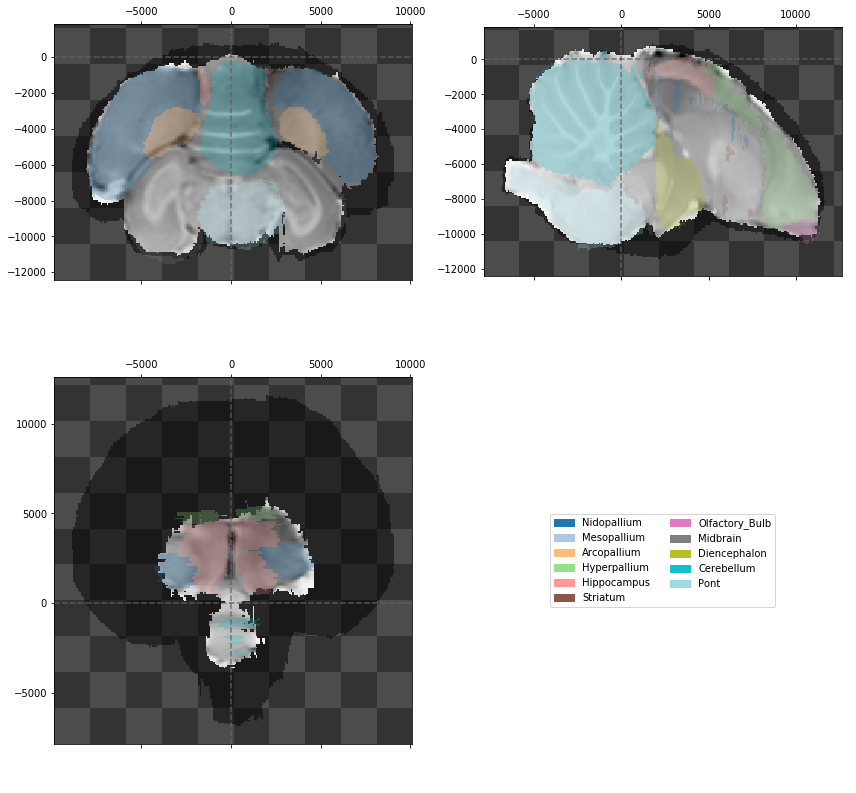

In [9]:
plot_2d_coordinates(starling_atlas, point_in_um= [0,0,0]);

### propose an updated y-sinus

In [9]:
updated_y_sinus = [0, 1500, -200]

{'medial-lateral': 0, 'anterior-posterior': 1500, 'dorsal-ventral': -200}
{'medial-lateral': 126, 'anterior-posterior': 98, 'dorsal-ventral': 203}


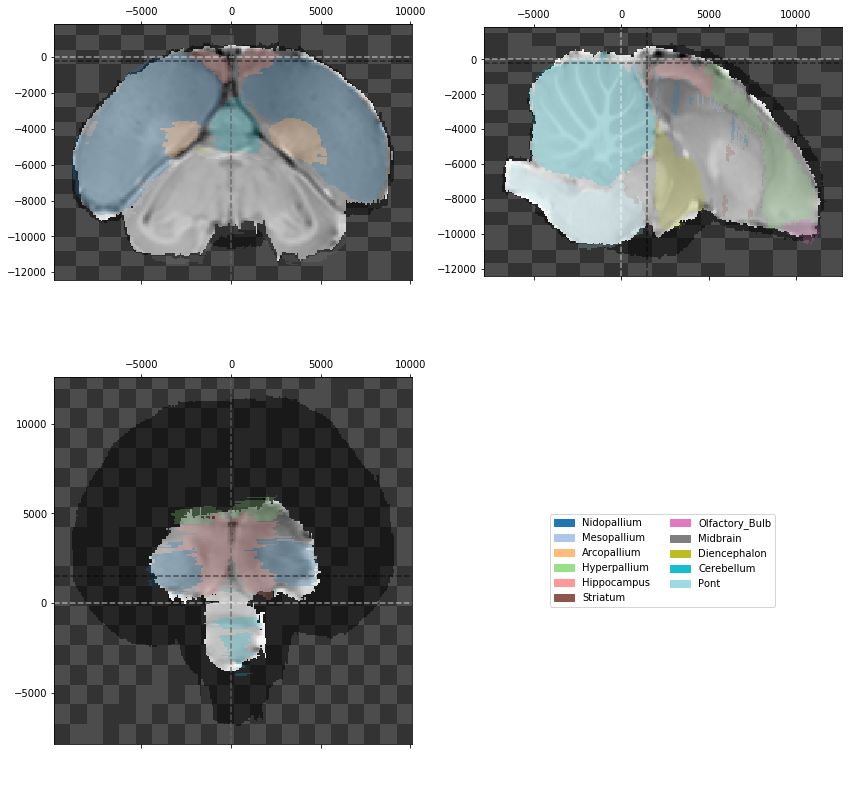

In [10]:
plot_2d_coordinates(starling_atlas, point_in_um= updated_y_sinus);

### Update the y-sinus in atlas

In [11]:
starling_atlas.update_y_sinus(updated_y_sinus=updated_y_sinus)

{'medial-lateral': 0, 'anterior-posterior': 0, 'dorsal-ventral': 0}
{'medial-lateral': 126, 'anterior-posterior': 98, 'dorsal-ventral': 203}


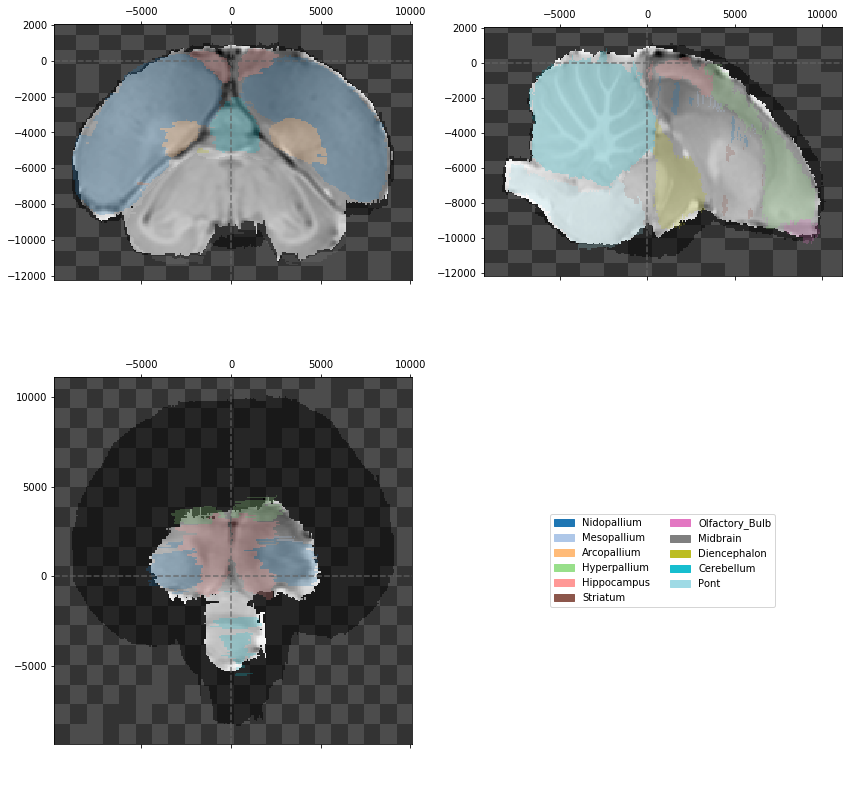

In [12]:
plot_2d_coordinates(starling_atlas, point_in_um= [0,0,0]);